In [0]:
import pandas as pd
import sklearn as sk
from sklearn.preprocessing import scale
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [5]:
df = pd.read_csv('creditcard.csv', low_memory = False)
df = df.sample(frac=1).reset_index(drop = True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,168173.0,0.199294,0.851952,-3.361006,-1.338529,3.251861,2.745413,0.610722,1.036045,-0.677010,-1.107587,-0.079592,-0.144306,-0.499039,-0.299483,-0.345743,-0.105847,0.819564,-0.153523,-0.525924,-0.178906,0.195443,0.413542,0.046653,0.655588,-0.265982,0.568034,-0.140990,-0.054164,42.81,0
1,41237.0,0.900682,-1.227165,-0.666704,-0.774332,1.139551,3.940487,-0.982401,1.005058,1.053336,-0.479494,-0.567018,0.402462,-0.052336,-0.368615,-0.089862,0.231663,-0.348611,-0.153807,0.777615,0.431348,-0.172448,-0.818561,-0.122286,1.087053,0.225638,0.937635,-0.067266,0.040540,198.08,0
2,42087.0,-1.399097,-0.025732,2.047794,1.566632,0.748094,-0.154467,-0.031014,0.170494,-0.180078,-0.265082,-0.693131,0.133069,-0.195276,-0.150024,0.271878,-1.196819,0.697246,-0.521024,0.835407,0.076996,0.051374,0.324671,-0.045079,0.111226,0.525132,-0.064911,-0.046560,0.191230,9.99,0
3,120646.0,1.963488,-0.501246,-0.304923,0.316092,-0.650180,-0.097390,-0.749832,0.098522,1.007212,0.172808,0.454771,1.016233,0.250932,-0.110192,-0.345681,0.598983,-0.855195,0.575424,0.140075,-0.158939,0.194880,0.756077,0.109603,-0.273725,-0.265135,0.568165,-0.022754,-0.059468,11.50,0
4,66975.0,-3.015993,-0.088885,0.815518,-0.051649,-1.803692,0.347270,-0.432743,1.438429,-1.717152,-0.529591,0.388134,0.672810,-0.723095,0.894921,-1.198199,-1.093638,0.524809,1.085193,-1.391216,-1.109115,-0.488986,-1.256516,0.183102,0.149968,0.178466,-0.717049,-0.283450,-0.505271,151.50,0


In [6]:
fraud = df.loc[df['Class'] == 1]
non_fraud = df.loc[df['Class'] == 0]
print(len(fraud))
print(len(non_fraud))


492
284315


<function matplotlib.pyplot.show>

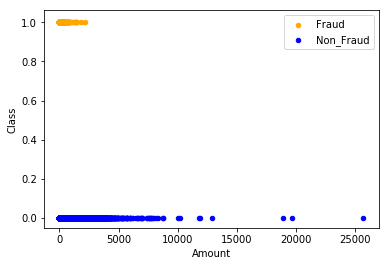

In [8]:
ax = fraud.plot.scatter(x = 'Amount', y = 'Class', color = 'Orange', label = 'Fraud')
non_fraud.plot.scatter(x = 'Amount', y = 'Class', color = 'Blue', label = 'Non_Fraud', ax = ax)
plt.show

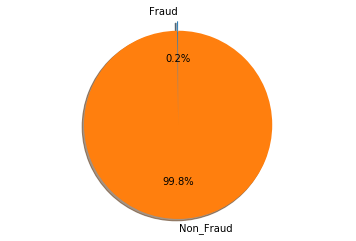

In [22]:
labels = 'Fraud', 'Non_Fraud'
sizes = [492, 284315]
explode = ( 0.1, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [23]:
logistic = linear_model.LogisticRegression(C = 1e5)
logistic.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
x = df.iloc[:, :-1]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20) 
print('Score:', logistic.score(X_test, y_test))

Score: 0.9987711105649381
